In [1]:
# We need to import necessary libararies first:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [2]:
# This step makes the Notebook not showing the warning lines. We don't need them for now.
from warnings import filterwarnings

In [3]:
filterwarnings('ignore')

In [4]:
# Import the Netflix dataset:
df = pd.read_csv('netflix_titles.csv')

In [5]:
# Let's see what this dataset looks like:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
# Cheking how many null data appear in our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Comment: At the first sight, not all columns are perfect. Some of them have missing values and we need to clean the data. The 'date_added' data need to be date type, not object type, and 'rating' should be number type.

In [7]:
# And how much percentage they occupy:
for col in df.columns:
    print('{} has {} % of missing values'.format(col, df[col].isnull().sum()/100))

show_id has 0.0 % of missing values
type has 0.0 % of missing values
title has 0.0 % of missing values
director has 26.34 % of missing values
cast has 8.25 % of missing values
country has 8.31 % of missing values
date_added has 0.1 % of missing values
release_year has 0.0 % of missing values
rating has 0.04 % of missing values
duration has 0.03 % of missing values
listed_in has 0.0 % of missing values
description has 0.0 % of missing values


#### We can see that 'director', 'cast' and 'country' have a large amount of missing values (or NaN values). It is risky for us if we use these columns for analysis. We can drop the 'director' and 'cast' because they are not really necessary for analysing, but 'country' is important for us to get some insights. So we will clean the data by filling missing values in 'country' and drop missing values if the number of them in the column is small.

## I. Preprocessing the Netflix data

### 1. The 'director' and 'cast' columns

#### As we diccuss before, it's risky if we use columns having large amount of missing values, and they might cause us troublein future. Because of that we will drop them.

In [8]:
df= df.drop('director', axis =1)
df= df.drop('cast', axis =1)

### 2. The 'rating' column 

In [9]:
# 'rating' columns only has 0.04% missing values so we will just drop the missing values by this command:
df.dropna(axis= 'index', subset= ['rating'], inplace = True)

In [10]:
# Ensure that there is no null value in 'rating' column:
df['rating'].isnull().sum()

0

In [11]:
# Showing the unique values, so we can see if there are any unusual values in our columns:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### '74 min', '84 min', '66 min' are not the rating of a show, they are duration. We will deal with these values now.

In [44]:
# Let's see what's going on in the row that have ['rating'] == '74 min':
df[df['rating'] == '74 min']

Empty DataFrame
Columns: [type, title, country, date_added, release_year, rating, duration, listed_in, description, added_year]
Index: []

#### The duration of this row had became rating

In [14]:
# We will replace duration with '74 min' and 'rating' with 'Unknown' (We don't know the rating of that movie yet)
df['duration'][5541] = '74 min'
df['rating'][5541] = 'Unknown'

In [15]:
# Now the row seems correct:
df.loc[5541, :]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                    Unknown
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [16]:
# The rows having '84 min' and '66 min' rating have the same situation, so we deal with the same solution:
df[df['rating'] == '84 min']

show_id   type                  title        country          date_added  \
5794   s5795  Movie  Louis C.K.: Hilarious  United States  September 16, 2016   

      release_year  rating duration listed_in  \
5794          2010  84 min      NaN    Movies   

                                            description  
5794  Emmy-winning comedy writer Louis C.K. brings h...

In [17]:
df[df['rating'] == '66 min']

show_id   type                                 title        country  \
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  United States   

           date_added  release_year  rating duration listed_in  \
5813  August 15, 2016          2015  66 min      NaN    Movies   

                                            description  
5813  The comic puts his trademark hilarious/thought...

In [18]:
df['duration'][5794] = '84 min'
df['rating'][5794] = 'Unknown'
df['duration'][5813] = '66 min'
df['rating'][5813] = 'Unknown'

In [19]:
df.loc[5794, :]

show_id                                                     s5795
type                                                        Movie
title                                       Louis C.K.: Hilarious
country                                             United States
date_added                                     September 16, 2016
release_year                                                 2010
rating                                                    Unknown
duration                                                   84 min
listed_in                                                  Movies
description     Emmy-winning comedy writer Louis C.K. brings h...
Name: 5794, dtype: object

In [20]:
df.loc[5813, :]

show_id                                                     s5814
type                                                        Movie
title                        Louis C.K.: Live at the Comedy Store
country                                             United States
date_added                                        August 15, 2016
release_year                                                 2015
rating                                                    Unknown
duration                                                   66 min
listed_in                                                  Movies
description     The comic puts his trademark hilarious/thought...
Name: 5813, dtype: object

In [21]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Unknown', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

#### The 'rating' columns is ready now

### 3. The 'country' column

#### For 'country' column, replace nan value with USA because Netflix was created in th USA and every shows aired on Netflix US. So instead of dropping all missing values in 'country' column, which has 8.25% missing values, we will use this solution to utilise data.

In [22]:
df['country'] = df['country'].replace(np.nan, 'United States')

In [23]:
df['country'].isnull().sum()

0

### 4. The 'show_id' column

#### The 'show_id' column is not necessary for our analysing because it just like the index of the data. So we will drop it.

In [24]:
# Drop 'show_id':
df = df.drop('show_id', axis = 1)

### 5. Changing the type of 'date_added' data

In [25]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [26]:
# We also drop the missing values of this columns because the percantage of them is small:
df.dropna(axis = 'index', subset= ['date_added'], inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8793 non-null   object        
 1   title         8793 non-null   object        
 2   country       8793 non-null   object        
 3   date_added    8793 non-null   datetime64[ns]
 4   release_year  8793 non-null   int64         
 5   rating        8793 non-null   object        
 6   duration      8793 non-null   object        
 7   listed_in     8793 non-null   object        
 8   description   8793 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 687.0+ KB


#### Our data is ready for analysing.

## II. Analysing Netflix Data

#### 1.The number of shows for each type on Netflix:

In [28]:
df['type'].isnull().sum()

0

In [29]:
# This step shows us how many Movies and TV Shows are airing on Netflix:
df['type'].value_counts()

Movie      6129
TV Show    2664
Name: type, dtype: int64

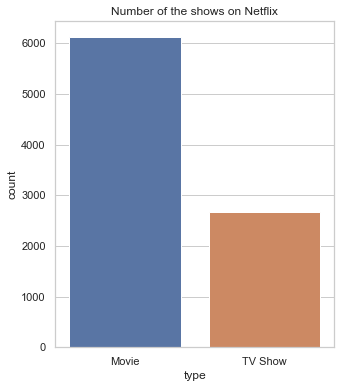

In [30]:
# Then we show them on a bar chart and pie chart to see how diffirent they are:
plt.figure(figsize= (5,6))
sns.set_theme(style = 'whitegrid')
sns.countplot(x = df['type'])
plt.title('Number of the shows on Netflix')
plt.show()

In [31]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [32]:
type_values = df['type'].value_counts()
trace1 = go.Pie(values = type_values, labels= ['Movie', 'TV Show'],
                title= 'The Ratio between the shows on Netflix')
iplot([trace1])

#### Comment: From two chart above, we can see Movies type has larger shows than TV Shows. It occupies nearly 70% of total. The point is Netflix is well known for being a great Movie streaming service. Howerver, 30% of the shows air on this service are TV Shows. That means TV shows has been playing an important role in American life.

In [33]:
# We creat a 'added_year' columns for analysing data by added to Netflix year:
df['added_year'] = pd.DatetimeIndex(df['date_added']).year

In [34]:
# That column appears at the last of the frame:
df.head()

type                  title        country date_added  release_year  \
0    Movie   Dick Johnson Is Dead  United States 2021-09-25          2020   
1  TV Show          Blood & Water   South Africa 2021-09-24          2021   
2  TV Show              Ganglands  United States 2021-09-24          2021   
3  TV Show  Jailbirds New Orleans  United States 2021-09-24          2021   
4  TV Show           Kota Factory          India 2021-09-24          2021   

  rating   duration                                          listed_in  \
0  PG-13     90 min                                      Documentaries   
1  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2  TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Act...   
3  TV-MA   1 Season                             Docuseries, Reality TV   
4  TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   

                                         description  added_year  
0  As her father nears the end of his life, filmm...        2021  
1  After crossing paths at a party, a Cape Town t...        2021  
2  To protect his family from a powerful drug lor...        2021  
3  Feuds, flirtations and toilet talk go down amo...        2021  
4  In a city of coaching centers known to train I...        2021

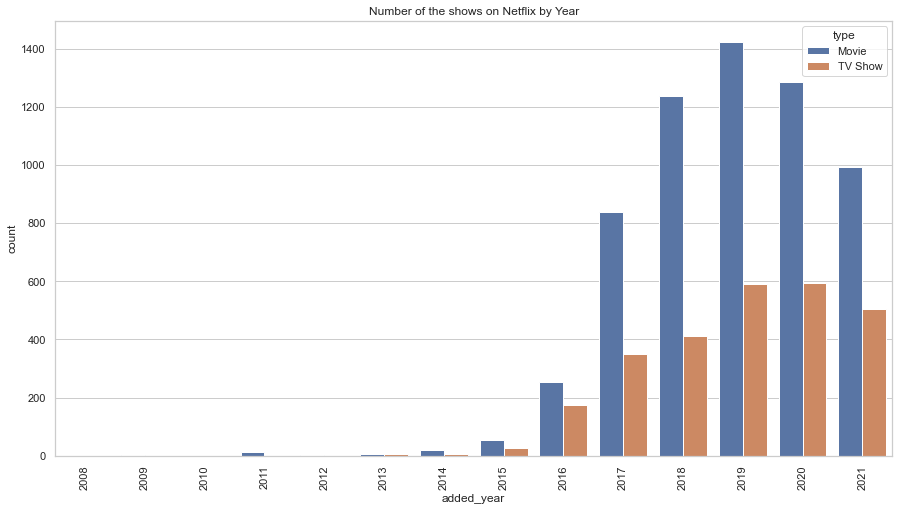

In [35]:
# Let's see how many Movies and TV Shows had been added to Netflix each year:
plt.figure(figsize= (15,8))
sns.set_theme(style = 'whitegrid')
sns.countplot(x = df['added_year'], hue = df['type'])
plt.xticks(rotation = 'vertical')
plt.title('Number of the shows on Netflix by Year')
plt.show()

In [40]:
df['date_added'].max()

Timestamp('2021-09-25 00:00:00')

#### Comment: Netflix started to add more shows from 2015 and they focus on increasing the number of movies more than TV Shows. But the percentage of TV Shows remains stable at 30%. In 2020, both numbers of Movies and TV Shows added to Netflix decreased slightly, the reason might be adversely affecting of Covid-19. The data we have only have information of Netflix shows till 25/09/2021, not the whole year, so in the bar chart above, the figure for 2021 does not reflect the situation of Netflix shows precisely.

#### 2. Which country provided the most shows on Netflix?

In [36]:
# We will create a frame containing top 10 countries which provided the most shows on Netflix:
df_country = df['country'].value_counts()
df_country

United States                             3641
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [37]:
# Transform it to a data frame for creating a chart later:
df_country = df_country.to_frame().reset_index()
df_country

index  country
0                             United States     3641
1                                     India      972
2                            United Kingdom      418
3                                     Japan      243
4                               South Korea      199
..                                      ...      ...
743              Romania, Bulgaria, Hungary        1
744                      Uruguay, Guatemala        1
745                France, Senegal, Belgium        1
746  Mexico, United States, Spain, Colombia        1
747            United Arab Emirates, Jordan        1

[748 rows x 2 columns]

In [38]:
# Change the column name:
df_country.columns = ['country', 'count']
df_country

country  count
0                             United States   3641
1                                     India    972
2                            United Kingdom    418
3                                     Japan    243
4                               South Korea    199
..                                      ...    ...
743              Romania, Bulgaria, Hungary      1
744                      Uruguay, Guatemala      1
745                France, Senegal, Belgium      1
746  Mexico, United States, Spain, Colombia      1
747            United Arab Emirates, Jordan      1

[748 rows x 2 columns]

In [42]:
# Here are top 10 countries we need:
df_country.head(10)

country  count
0   United States   3641
1           India    972
2  United Kingdom    418
3           Japan    243
4     South Korea    199
5          Canada    181
6           Spain    145
7          France    124
8          Mexico    110
9           Egypt    106

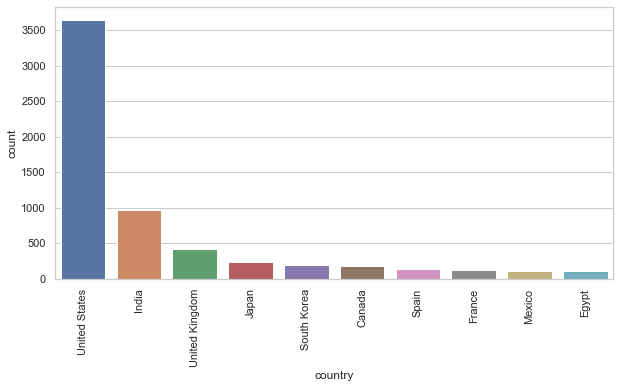

In [43]:
# Let's creat a bar chart form this data:
plt.figure(figsize= (10,5))
sns.barplot(data = df_country.head(10), x= 'country', y= 'count')
plt.xticks(rotation = 'vertical')
plt.show()

#### Comment:It is obvious that the USA is top 1 here among the countries in producing shows. We still get India, the United Kingdom, Japan... in the top list but the USA stands on the top with an outstanding number of shows added to Netflix. The reason we may have known is the USA is one of the countries which has the biggest film industry in the world. The quality of the movies or TV shows they made is great. The other reason is Netflix is an American company and the audiences are American mostly, so they prefer adding the shows provided by their country.

#### 3. Analysing the duration of the shows:

In [45]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

#### We can see duration data of the show has 2 types: 'min' and 'seasons'. The series shows have the 'seasons' duration and the non-series shows have the 'min' duration. 

In [46]:
# That's why we will divide this 'duration' data into duraitons of series and non-series shows.
# First we define a fuction that helps us extract the 'duration type' ('min' or 'Season')
def split(x):
    return x.split(' ')[1]

In [48]:
# Apply that funtion to 'duration' column and creat 2 data frame from it: the series and non-series shows data frame
df_non = df[df['duration'].apply(split) == 'min']
df_non.head() #the non-series shows dataframe

type                             title  \
0   Movie              Dick Johnson Is Dead   
6   Movie  My Little Pony: A New Generation   
7   Movie                           Sankofa   
9   Movie                      The Starling   
12  Movie                      Je Suis Karl   

                                              country date_added  \
0                                       United States 2021-09-25   
6                                       United States 2021-09-24   
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   

    release_year rating duration  \
0           2020  PG-13   90 min   
6           2021     PG   91 min   
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   

                                           listed_in  \
0                                      Documentaries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   

                                          description  added_year  
0   As her father nears the end of his life, filmm...        2021  
6   Equestria's divided. But a bright-eyed hero be...        2021  
7   On a photo shoot in Ghana, an American model s...        2021  
9   A woman adjusting to life after a loss contend...        2021  
12  After most of her family is murdered in a terr...        2021

In [51]:
# The series shows data frame:
df_ss = pd.DataFrame()
season = ['Season', 'Seasons']
for i in season:
    df_ss = df_ss.append(df[df['duration'].apply(split) == i])
df_ss.head()

type                                title        country date_added  \
2   TV Show                            Ganglands  United States 2021-09-24   
3   TV Show                Jailbirds New Orleans  United States 2021-09-24   
5   TV Show                        Midnight Mass  United States 2021-09-24   
10  TV Show  Vendetta: Truth, Lies and The Mafia  United States 2021-09-24   
11  TV Show                     Bangkok Breaking  United States 2021-09-23   

    release_year rating  duration  \
2           2021  TV-MA  1 Season   
3           2021  TV-MA  1 Season   
5           2021  TV-MA  1 Season   
10          2021  TV-MA  1 Season   
11          2021  TV-MA  1 Season   

                                            listed_in  \
2   Crime TV Shows, International TV Shows, TV Act...   
3                              Docuseries, Reality TV   
5                  TV Dramas, TV Horror, TV Mysteries   
10  Crime TV Shows, Docuseries, International TV S...   
11  Crime TV Shows, International TV Shows, TV Act...   

                                          description  added_year  
2   To protect his family from a powerful drug lor...        2021  
3   Feuds, flirtations and toilet talk go down amo...        2021  
5   The arrival of a charismatic young priest brin...        2021  
10  Sicily boasts a bold "Anti-Mafia" coalition. B...        2021  
11  Struggling to earn a living in Bangkok, a man ...        2021

In [52]:
# Analysing duration of non-series shows:
df_non['duration'].value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [54]:
# This function help us extract the number of duration:
def split_1(x):
    return x.split(' ')[0]

In [56]:
df_non['duration'] = np.array(df_non['duration'].apply(split_1))
df_non['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6129, dtype: object

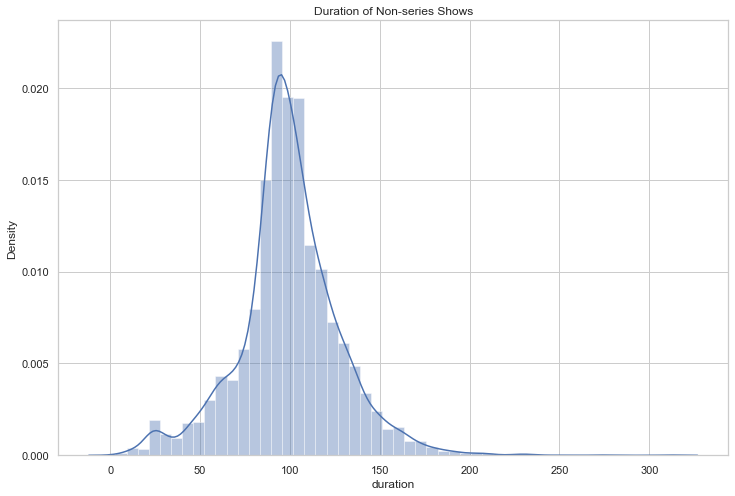

In [57]:
# Now we got the data we want, it's time to bring them on a distribution chart:
plt.figure(figsize = (12,8))
sns.distplot(df_non['duration'])
plt.title('Duration of Non-series Shows')
plt.show()

In [63]:
df_non['duration'].astype(int).mean()

99.57268722466961

In [64]:
df_non['duration'].astype(int).median()

98.0

#### Comment: The distribution of durations of non-series shows is follwing Normal distribution with the mean value is 99.5 min.  Most of non-series shows have duration around 100 min, that is the proper duration for a non-series show because people usually have 2-3 hours per day for entertainment. If the show is too long, they might have consider to watch another one which is shorter, or if they really interested in that show, they might have too watch it in 2 days or more. In the future, this distribution of duration may change base on how much time people have to spend on watching online shows.

In [58]:
#Now it's time for analysing the duration of series shows:
df_ss_du= df_ss['duration'].value_counts()
df_ss_du

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

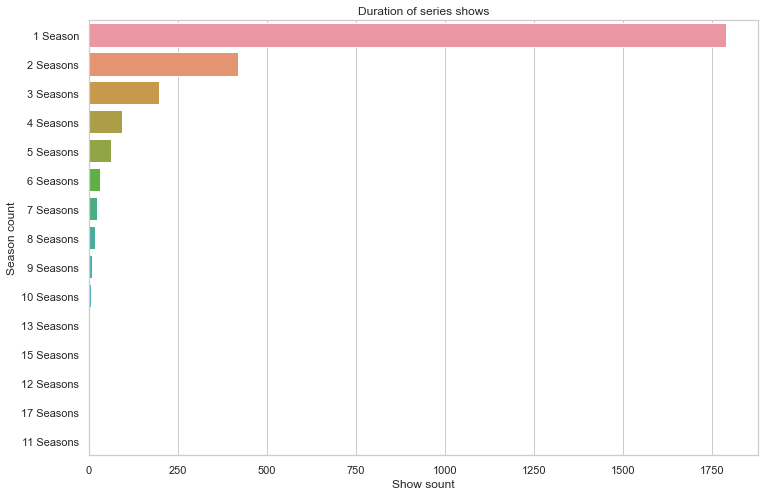

In [59]:
# This is what we have if showing them by a bar chart:
plt.figure(figsize = (12,8))
sns.barplot(y= df_ss_du.index, x = df_ss_du)
plt.ylabel('Season count')
plt.xlabel('Show sount')
plt.title('Duration of series shows')
plt.show()

#### Comment: Most of series shows only have 1 season. The shows which have 9 seasons and above are very few. The audiences might don't have too much time to spend on TV shows with a lot of seasons, or making a show like that will cost too much for the producer. The audience start to follow a series show because the first season of it is really attractive, but if the next seasons become worse, they might don't want to watch other season anymore, and the fame of producer would be affected. So it is risky to making more season of a show.

#### 4. Analysing the ratings of the shows on Netflix

In [69]:
df['rating'].isnull().sum()

0

In [70]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Unknown', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [71]:
# Which are the most ratings of the shows on Netflix?:
df_rate = df['rating'].value_counts()

In [72]:
df_rate

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Unknown        3
UR             3
Name: rating, dtype: int64

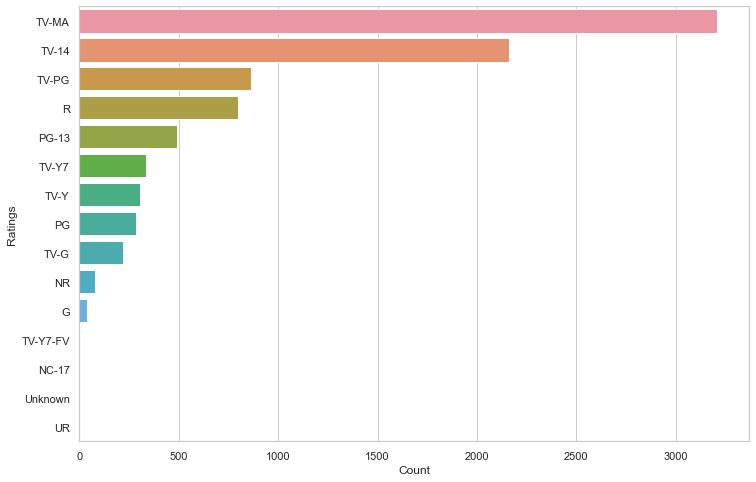

In [73]:
plt.figure(figsize = (12,8))
sns.barplot(x = df_rate, y = df_rate.index)
plt.ylabel('Ratings')
plt.xlabel('Count')
plt.show()

In [74]:
## Using plotly:
df_rate = df_rate.to_frame().reset_index()
df_rate.columns = ['ratings', 'count']

In [75]:
trace2 = go.Bar(x= df_rate['ratings'], y = df_rate['count'])
iplot([trace2])

In [76]:
labs = df['rating'].value_counts().index
trace3 = go.Pie(values= df['rating'].value_counts(),
                labels= labs,
                hoverinfo= 'label+percent')
iplot([trace3])

In [77]:
## --> TV-MA (shows for adult), TV-14 (unsuitable for children under the age of 14) are the most ratings of shows on Netflix.

In [78]:
# Looking at the changing of TV-MA and TV-14 through the years:
df_rate_1 = pd.DataFrame()
for i in ['TV-MA', 'TV-14']:
    df_rate_1 = df_rate_1.append(df[df['rating']== i])

In [79]:
df_rate_1['rating'].unique()

array(['TV-MA', 'TV-14'], dtype=object)

In [80]:
# Create a data frame with date_added, rating, and rating count:
df_rate_1 = df_rate_1.groupby(['date_added', 'rating'])['rating'].count().to_frame()

In [81]:
## We can't reset the index unless the index columns and data columns have different names:
df_rate_1.columns = ['rating_count']

In [82]:
df_rate_1.reset_index(inplace = True)

In [83]:
df_rate_1

date_added rating  rating_count
0    2008-01-01  TV-MA             1
1    2008-02-04  TV-MA             1
2    2009-05-05  TV-MA             1
3    2009-11-18  TV-MA             1
4    2011-05-17  TV-MA             1
...         ...    ...           ...
2101 2021-09-22  TV-14             3
2102 2021-09-22  TV-MA             5
2103 2021-09-23  TV-MA             2
2104 2021-09-24  TV-14             1
2105 2021-09-24  TV-MA             7

[2106 rows x 3 columns]

<AxesSubplot:xlabel='date_added', ylabel='rating_count'>

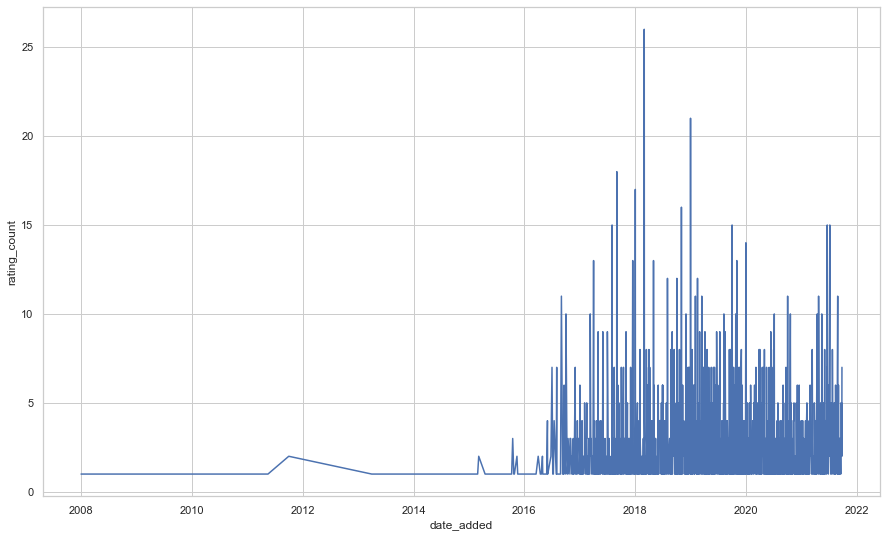

In [84]:
plt.figure(figsize= (15,9))
sns.lineplot(data= df_rate_1[df_rate_1['rating'] == 'TV-MA'], x= 'date_added', y= 'rating_count')

<AxesSubplot:xlabel='date_added', ylabel='rating_count'>

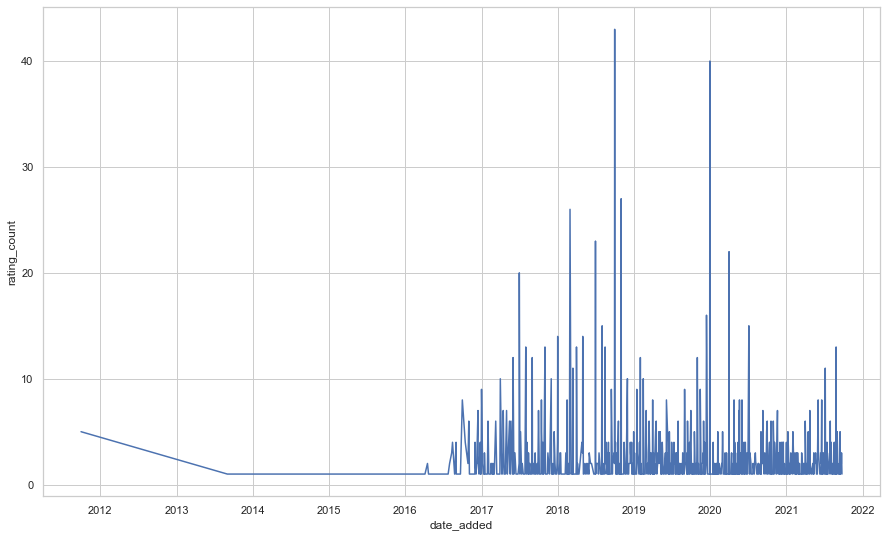

In [85]:
plt.figure(figsize= (15,9))
sns.lineplot(data= df_rate_1[df_rate_1['rating'] == 'TV-14'], x= 'date_added', y= 'rating_count')

#### 5. How duration of movies and TV shows changed?

In [86]:
# Looking at the mumber of show added to Neflix through years:
df_movie = df[df['type'] == 'Movie']
df_movie

type                             title  \
0     Movie              Dick Johnson Is Dead   
6     Movie  My Little Pony: A New Generation   
7     Movie                           Sankofa   
9     Movie                      The Starling   
12    Movie                      Je Suis Karl   
...     ...                               ...   
8801  Movie                           Zinzana   
8802  Movie                            Zodiac   
8804  Movie                        Zombieland   
8805  Movie                              Zoom   
8806  Movie                            Zubaan   

                                                country date_added  \
0                                         United States 2021-09-25   
6                                         United States 2021-09-24   
7     United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                         United States 2021-09-24   
12                              Germany, Czech Republic 2021-09-23   
...                                                 ...        ...   
8801                       United Arab Emirates, Jordan 2016-03-09   
8802                                      United States 2019-11-20   
8804                                      United States 2019-11-01   
8805                                      United States 2020-01-11   
8806                                              India 2019-03-02   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
6     Equestria's divided. But a bright-eyed hero be...  
7     On a photo shoot in Ghana, an American model s...  
9     A woman adjusting to life after a loss contend...  
12    After most of her family is murdered in a terr...  
...                                                 ...  
8801  Recovering alcoholic Talal wakes up inside a s...  
8802  A political cartoonist, a crime reporter and a...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[6129 rows x 9 columns]

In [87]:
df_movie_time = df_movie.groupby('date_added')['type'].count()

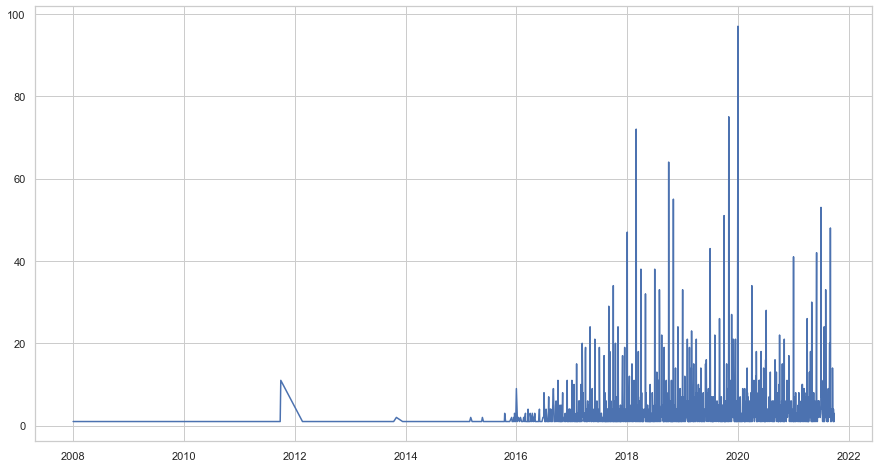

In [88]:
plt.figure(figsize = (15,8))
plt.plot(df_movie_time)

In [89]:
df_tv = df[df['type'] == 'TV Show']
df_tv_time = df_tv.groupby('date_added')['type'].count()

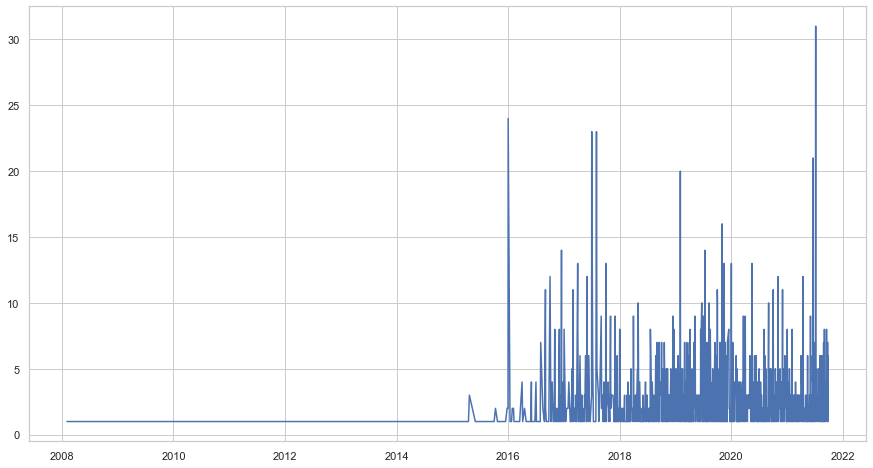

In [90]:
plt.figure(figsize = (15,8))
plt.plot(df_tv_time)

#### 6. Number of the shows by realeased year:

In [91]:
# Number of the TV Shows by year:
df_tv = df[df['type'] == 'TV Show']
df_tv_ryear = df_tv.groupby('release_year')['type'].count()

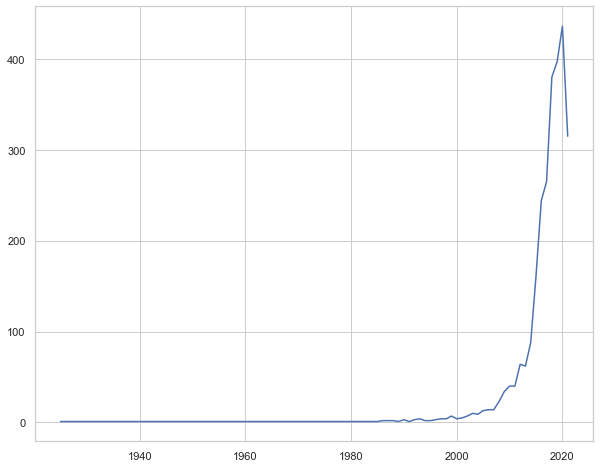

In [92]:
plt.figure(figsize = (10,8))
plt.plot(df_tv_ryear)

In [93]:
# Number of Movie bby year:
df_movie = df[df['type'] == 'Movie']
df_movie_ryear = df_movie.groupby('release_year')['type'].count()

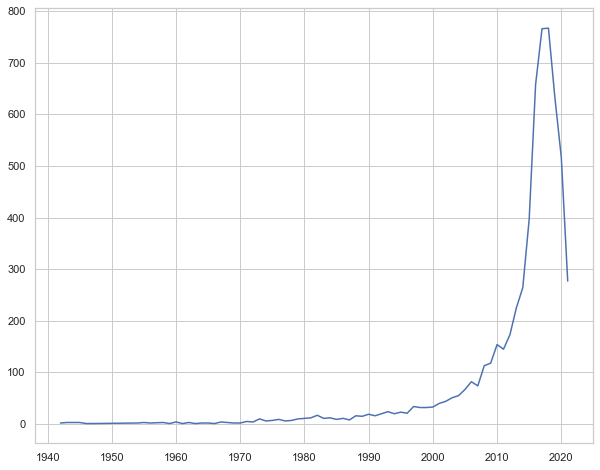

In [94]:
plt.figure(figsize = (10,8))
plt.plot(df_movie_ryear)

In [95]:
## --> Most of the shows on Neflix were realeased from 2000.

#### 7. Looking at the most used words for Shows Titles and Descriptions

In [96]:
import wordcloud

In [97]:
from wordcloud import WordCloud, STOPWORDS

In [98]:
# Most words used for Shows Titles:
df['title']

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8803, dtype: object

In [99]:
title = ''.join(df['title'])

In [100]:
wordcloud = WordCloud(stopwords= STOPWORDS).generate(title)

(-0.5, 399.5, 199.5, -0.5)

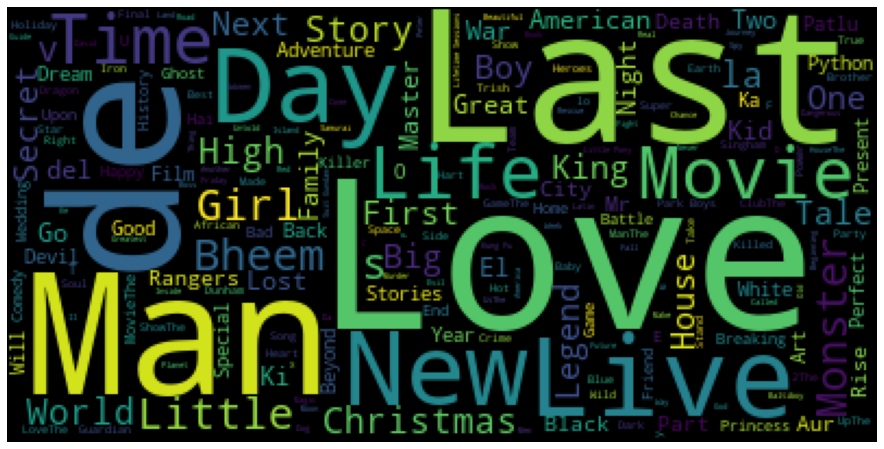

In [101]:
plt.figure(figsize = (18,8))
plt.imshow(wordcloud)
plt.axis('off')

In [102]:
# Most words used for Shows Descriptions:
des = ''.join(df['description'])

In [103]:
wordcloud = WordCloud(stopwords= STOPWORDS).generate(des)

(-0.5, 399.5, 199.5, -0.5)

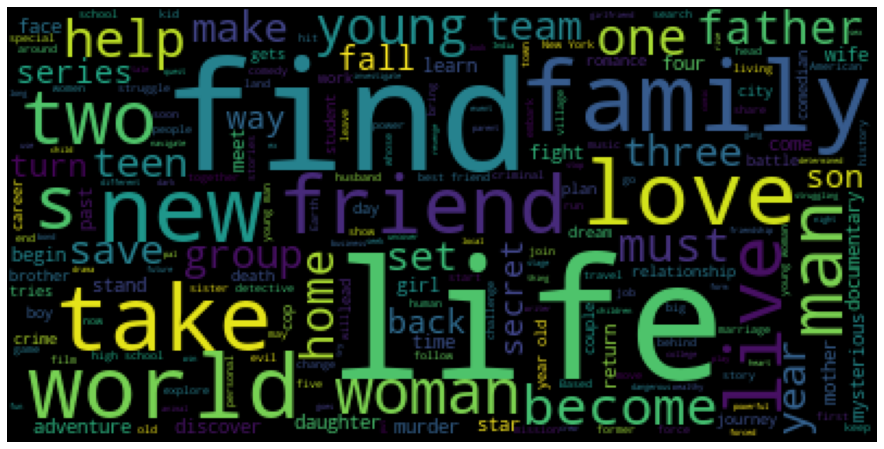

In [104]:
plt.figure(figsize = (18,8))
plt.imshow(wordcloud)
plt.axis('off')